In [193]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [194]:
import matplotlib.pyplot as plt
import numpy as np
from suite2p.blat.behaviour import extract_behaviour

root = '/home/loulou/Documents/Data/Test/place_cells2'

spks = np.load('/'.join((root, 'suite2p/plane0/spks.npy')), allow_pickle=True)
md = np.load('/'.join((root, 'suite2p/plane0/model.npy')), allow_pickle=True)

fn = '/home/loulou/Documents/Data/Test/place_cells2/behaviour_00009.h5'
behaviour = extract_behaviour(fn)

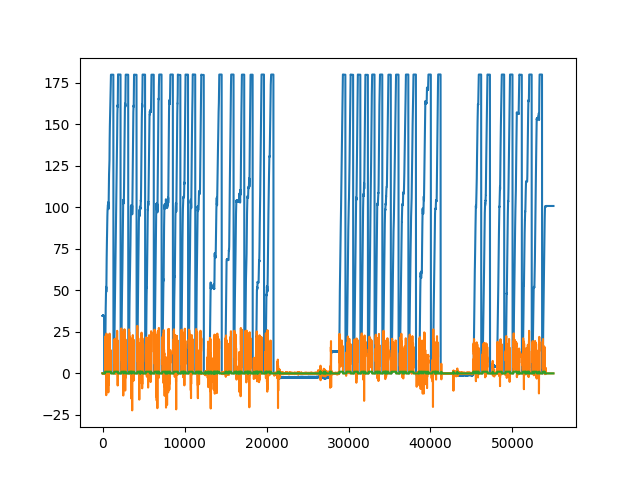

In [190]:
fig = plt.figure()
plt.plot(behaviour['position'])
plt.plot(behaviour['velocity'])
plt.plot(behaviour['movement'])

/home/loulou/Documents/GitHub/suite2p/suite2p/blat/space.py:67: RuntimeWarning: invalid value encountered in divide
  rasters = rasters / occ
/home/loulou/Documents/GitHub/suite2p/.venv/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/loulou/Documents/GitHub/suite2p/.venv/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/loulou/Documents/GitHub/suite2p/.venv/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/home/loulou/Do

[0.2 0.1 0.9 0.1 0.8 0.6 0.1 0.9 0.7 0.7 1.  0.1 0.1 0.7 0.8 1.  0.1 0.1
 0.3 0.1 1.  0.3 0.1 0.1 0.9 0.6 0.7 0.6 0.9 0.2 0.1 0.9 0.3 0.9 1.  1.
 1.  0.6 0.8 0.7 0.9 0.1 1.  0.2 0.1 1.  0.4 1.  0.4 0.2 1.  0.5 1.  0.1
 0.3 0.1 0.4 1.  0.8 0.2 0.6 0.4 0.1 0.9 0.5 1.  0.1 0.6 0.3 0.4 0.8 0.1
 0.9 1.  0.5 1.  0.2 0.1 0.5 0.3 0.7 0.8 1.  0.9 0.1 1.  0.1 0.7 0.8 0.1
 1.  0.6 0.2 1.  1.  0.1 1.  0.8 0.6 0.3 0.3 0.8 0.5 0.1 1.  1.  0.1 0.3
 0.1 1.  1.  0.1 1.  0.9 0.6 0.2 0.5 0.7 0.1 0.6 0.2 0.1 0.1 0.1 0.3 0.3
 0.5 0.8 0.1 0.1 0.9 1.  1.  0.8 0.1 0.1 0.2 0.2 0.2 1.  1.  0.9 0.2 0.2
 0.1 0.1 1.  0.8 0.8 0.1 1.  1.  1.  0.7 0.7 0.1 0.1 0.1 0.3 0.7 0.3 1.
 1.  1.  0.7 0.8 1.  0.1 0.1 0.5 0.3 1.  0.3 1.  0.5 0.7 0.9 0.5 0.4 0.1
 0.8 0.1 1.  0.1 0.1]
 

/tmp/ipykernel_489842/3786041943.py:9: RuntimeWarning: invalid value encountered in divide
  stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
/tmp/ipykernel_489842/3786041943.py:14: RuntimeWarning: invalid value encountered in divide
  stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
/tmp/ipykernel_489842/3786041943.py:17: RuntimeWarning: invalid value encountered in divide
  stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)


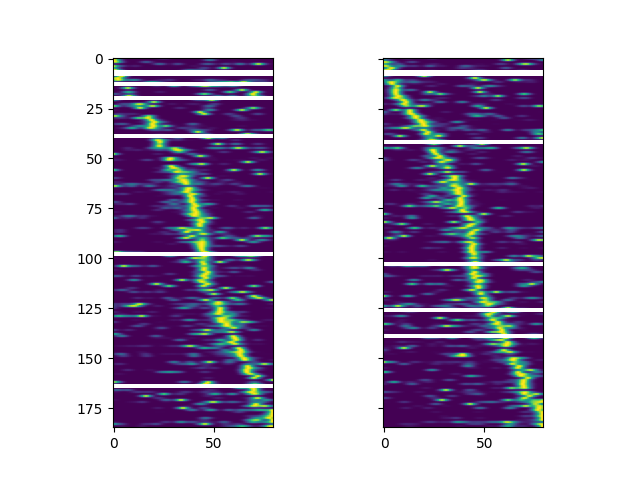

         2870102 function calls (2766328 primitive calls) in 13.207 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    13875    0.338    0.000    0.655    0.000 functools.py:35(update_wrapper)
188266/188080    0.315    0.000    0.320    0.000 {built-in method builtins.isinstance}
     9435    0.314    0.000    0.616    0.000 parallel.py:356(__init__)
    11250    0.312    0.000    2.216    0.000 parallel.py:1746(_retrieve)
9449/6638    0.299    0.000    0.391    0.000 {built-in method numpy.core._multiarray_umath.correlate}
     1316    0.276    0.000    1.335    0.001 {method 'dump' of '_pickle.Pickler' objects}
   164645    0.267    0.000    0.267    0.000 {built-in method builtins.getattr}
136652/136407    0.261    0.000    0.310    0.000 {built-in method builtins.len}
19122/1404    0.226    0.000    7.441    0.005 {method 'get' of '_queue.SimpleQueue' objects}
    10747    0.209    0.000    3.304    0.000 parallel.py:1

In [264]:
from suite2p.blat import space

iscell = np.load('/'.join((root, 'suite2p/plane0/iscell.npy')), allow_pickle=True)
iscell = iscell[:, 0].astype(bool)

%prun hmap = space.hmaps(behaviour, spks[iscell, :])
stack = hmap['smooth']['stack'].T
rasters = hmap['smooth']['rasters']
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
order = np.argsort(np.argmax(stack, axis=0))

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
stack = np.mean(rasters[:, :, ::2], axis=2).T
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
ax[0].imshow(stack[:, order].T)
stack = np.mean(rasters[:, :, 1::2], axis=2).T
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
ax[1].imshow(stack[:, order].T)

# fig = plt.figure()
# plt.imshow(rasters[9, :, :].T)
# plt.plot(behaviour['position'][behaviour['movement']])

(array([ 2.,  3.,  2.,  8., 11., 14., 13., 11.,  8., 10., 13., 18., 11.,
         9., 14.,  4.,  8.,  8.,  2.,  3.,  2.,  3.,  1.,  0.,  3.,  1.,
         1.,  1.,  0.,  1.]),
 array([0.        , 0.03339   , 0.06677999, 0.10016999, 0.13355998,
        0.16694998, 0.20033997, 0.23372997, 0.26711996, 0.30050996,
        0.33389995, 0.36728995, 0.40067994, 0.43406994, 0.46745993,
        0.50084993, 0.53423992, 0.56762992, 0.60101991, 0.63440991,
        0.6677999 , 0.7011899 , 0.73457989, 0.76796989, 0.80135988,
        0.83474988, 0.86813987, 0.90152987, 0.93491986, 0.96830986,
        1.00169985]),
 <BarContainer object of 30 artists>)

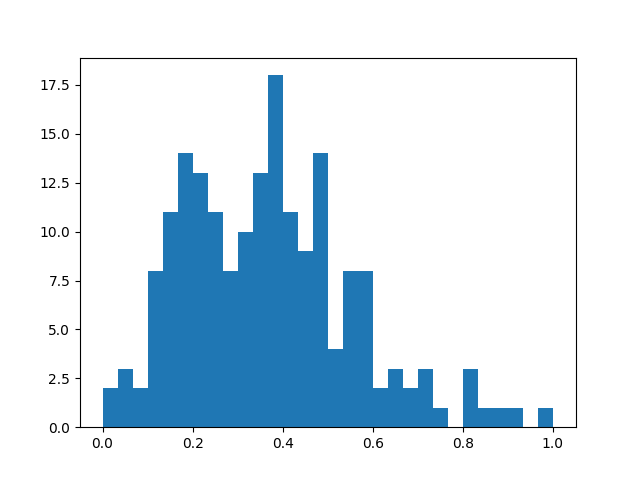

In [227]:
fig = plt.figure()
plt.hist(hmap['SI'], 30)

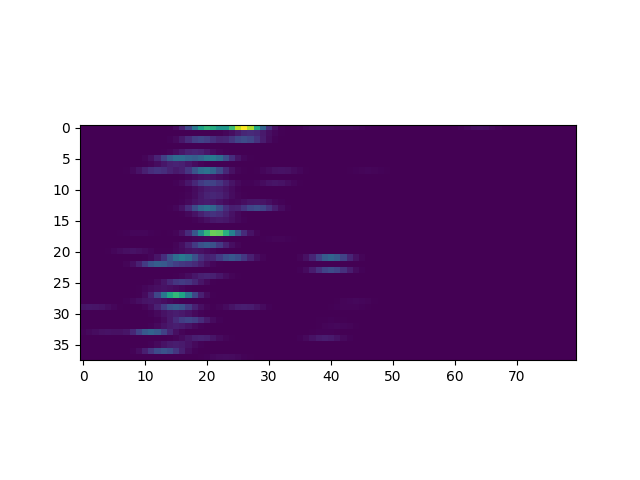

In [244]:
idx = np.argmax(hmap['SI'])
fig = plt.figure()
plt.imshow(hmap['smooth']['rasters'][idx, :, :].T)

In [247]:
print(hmap['smooth']['rasters'].shape)
print(behaviour['trial'].shape)

(185, 80, 38)
(39,)


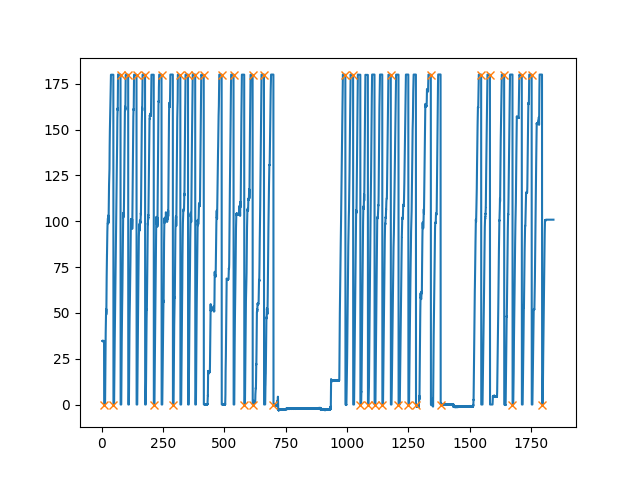

In [249]:
fig = plt.figure()
plt.plot(behaviour['ts'], behaviour['position'])
plt.plot(behaviour['ts'][behaviour['trial']], behaviour['position'][behaviour['trial']], 'x')

In [258]:
(,)

SyntaxError: invalid syntax (3994584492.py, line 1)